In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import datetime
import pickle

In [68]:
data = pd.read_csv('ANZ synthesised transaction dataset.csv')
data.head()

,index,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,2,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,3,authorized,1.0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,4,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [5]:
pd.DataFrame({"Data type":data.dtypes})

,Data type
status,object
card_present_flag,float64
bpay_biller_code,object
account,object
currency,object
long_lat,object
txn_description,object
merchant_id,object
merchant_code,float64
first_name,object


In [6]:
data[data.duplicated()]

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement


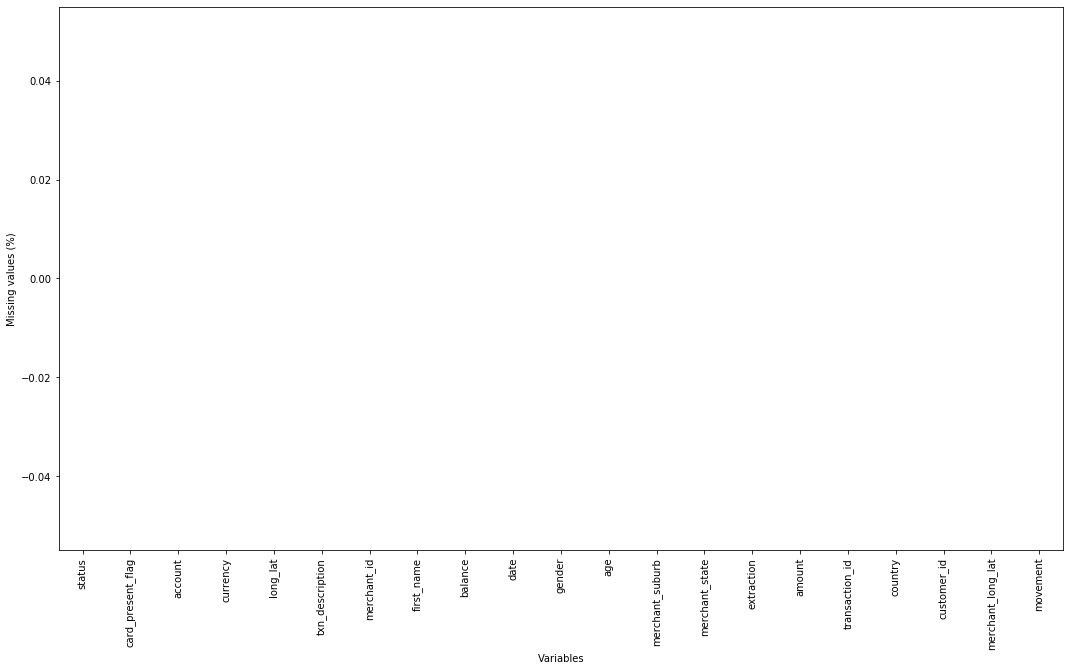

In [30]:
# Plot missing data
(data.isnull().sum()/len(data.index)*100).plot(kind="bar", figsize=(18,10))
# Set axis labels
plt.xlabel("Variables")
plt.ylabel("Missing values (%)")
plt.show()

In [29]:
#Missing values of a feature greater than 65% is drpped
print('Missing Value Occurence Greater than 65%    Columns Name')
for c in data.columns:
    null_occurance = data[c].isnull().sum().sum()
    
#     # #drop those Column with 65% to 100% values as NaN
#     if (null_occurance > int(len(data[c])*0.65)):
#         data = data.drop(c, axis=1)
    print(null_occurance,'\t\t\t\t\t   ',c)

Missing Value Occurence Greater than 65%    Columns Name
0 					    status
0 					    card_present_flag
0 					    account
0 					    currency
0 					    long_lat
0 					    txn_description
0 					    merchant_id
0 					    first_name
0 					    balance
0 					    date
0 					    gender
0 					    age
0 					    merchant_suburb
0 					    merchant_state
0 					    extraction
0 					    amount
0 					    transaction_id
0 					    country
0 					    customer_id
0 					    merchant_long_lat
0 					    movement


In [34]:
data.dropna(axis=0, how='any', inplace=True)
data.reset_index(inplace=True)
data

In [36]:
if not os.path.exists(os.path.join("..", "processed_data")):
    os.makedirs(os.path.join("..", "processed_data"))

#I saved the data as a picke file in 'train_data.pkl' and 'hist_data.pkl'    
PICKLE_TRAIN_DIR = os.path.join("..", "processed_data", "ANZ_Transaction.pkl")

pd.to_pickle(data, PICKLE_TRAIN_DIR)

In [39]:
data.to_csv(r'processed_data\ANZTrans.csv', index = False)

In [67]:
data.long_lat.unique()

array(['153.41 -27.95', '151.23 -33.94', '153.10 -27.66', '144.95 -37.76',
       '116.06 -32.00', '153.05 -27.61', '145.45 -37.74', '153.32 -27.93',
       '115.74 -31.72', '145.35 -38.03', '147.08 -37.97', '150.82 -34.01',
       '152.99 -27.49', '138.52 -35.01', '145.73 -17.03', '114.62 -28.80',
       '153.09 -27.48', '115.79 -31.79', '145.09 -37.82', '138.67 -34.86',
       '255.00 -573.00', '144.89 -37.81', '151.23 -33.96',
       '142.77 -37.06', '150.90 -33.78', '145.13 -37.70', '145.00 -37.83',
       '115.98 -32.07', '151.12 -33.89', '150.68 -33.79', '130.90 -12.37',
       '145.04 -37.85', '115.78 -31.90', '130.84 -12.45', '145.03 -37.91',
       '144.79 -37.73', '151.22 -33.87', '143.83 -37.66', '147.63 -22.84',
       '150.79 -33.64', '150.92 -33.77', '145.01 -37.93', '151.68 -32.98',
       '146.92 -36.07', '144.97 -37.42', '149.19 -21.15', '147.61 -37.82',
       '145.04 -37.92', '150.90 -34.37', '145.16 -37.84', '151.27 -33.76',
       '153.41 -28.01', '149.83 -29.47', 